<a href="https://colab.research.google.com/github/LilianeEff/Data205/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_palette("bright")
sns.set_theme(style="white")
import folium
from folium.plugins import HeatMap

**Datasets used**

The School dataset lists all the schools in the counties along with their performance.
The location dataset has the cities in which the schools are located.

In [ ]:
school=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/FY2013_MSDE_School_Participation_Indicators_-_All_Schools_20250208.csv")
location=pd.read_csv("https://raw.githubusercontent.com/LilianeEff/Data205/refs/heads/main/Datasets/Public_Schools.csv")



For the third dataset, an API request had to be sent to the Census Bureau. This dataset comprises the median home value in cities surrounding Montgomery County.

In [ ]:
import requests

# Census API endpoint
url = "https://api.census.gov/data/2022/acs/acs5"

# Parameters for API request
params = {
    "get": "NAME,B25077_001E",  # NAME = City Name, B25077_001E = Median Home Value
    "for": "place:*",           # Get all places (cities/towns)
    "in": "state:24",           # Maryland (state:24)
}

# API request
response = requests.get(url, params=params)

# Check if request was success
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    df = pd.DataFrame(data[1:], columns=data[0])  # Convert to Pandas DataFrame
    df["B25077_001E"] = pd.to_numeric(df["B25077_001E"], errors="coerce")  # Convert median home value to numeric

    # Manually filter cities in Montgomery County
    montgomery_cities = [
        "Chevy Chase", "Chevy Chase Section Five",
        "Chevy Chase Section Three", "Aspen Hill", "Damascus", "Chevy Chase View", "Chevy Chase Village",
        "Gaithersburg", "Clarksburg", "Olney", "Garrett Park", "Glen Echo", "Kensington", "Laytonsville",
        "Martins Additions", "North Chevy Chase", "Poolesville", "Rockville",
       "Takoma Park", "Seneca Valley", "Derwood", "white Oak", "Washington Grove", "Burtonsville", "Cloverly", "Kemp Mill", "Glenmont", "Wheaton", "Silver Spring", "Bethesda", "Potomac", "Germantown",
    ]

    # Filter DataFrame for only Montgomery County cities
    df = df[df["NAME"].str.contains('|'.join(montgomery_cities), case=False, na=False)]

    # Rename columns for
    df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
    df = df.reset_index(drop=True)  # Reset index for better display

    print(df)
else:
    print(f"Error: {response.status_code}", response.text)


                                           City  Median Home Value state  \
0                      Aspen Hill CDP, Maryland             495800    24   
1                        Bethesda CDP, Maryland            1088000    24   
2                    Burtonsville CDP, Maryland             475800    24   
3                    Chevy Chase town, Maryland            1616900    24   
4                     Chevy Chase CDP, Maryland            1159700    24   
5    Chevy Chase Section Five village, Maryland            1542900    24   
6   Chevy Chase Section Three village, Maryland            1555400    24   
7               Chevy Chase View town, Maryland            1181800    24   
8            Chevy Chase Village town, Maryland            2000001    24   
9                      Clarksburg CDP, Maryland             604000    24   
10                       Cloverly CDP, Maryland             626200    24   
11                       Damascus CDP, Maryland             474800    24   
12          

In [ ]:
display(df)  #this is what the dataframe actually looks like. It does have a couple of columns that
             # are extraneous.

,City,Median Home Value,state,place
0,"Aspen Hill CDP, Maryland",495800,24,02825
1,"Bethesda CDP, Maryland",1088000,24,07125
2,"Burtonsville CDP, Maryland",475800,24,11750
3,"Chevy Chase town, Maryland",1616900,24,16620
4,"Chevy Chase CDP, Maryland",1159700,24,16625
5,"Chevy Chase Section Five village, Maryland",1542900,24,16720
6,"Chevy Chase Section Three village, Maryland",1555400,24,16730
7,"Chevy Chase View town, Maryland",1181800,24,16775
8,"Chevy Chase Village town, Maryland",2000001,24,16787
9,"Clarksburg CDP, Maryland",604000,24,17350


**Data cleaning**: removing the two columns that are not needed, and renaming the cities by omitting the extra letters attached to them from the df dataframe.

Eliminating elementary and middle schools from the school dataframe.

In [ ]:
df = df.rename(columns={"NAME": "City", "B25077_001E": "Median Home Value"})
df = df.reset_index(drop=True)

# Remove 'state' and 'place' columns
if 'state' in df.columns:
        df = df.drop('state', axis=1)
if 'place' in df.columns:
        df = df.drop('place', axis=1)

display(df)


,City,Median Home Value
0,"Aspen Hill CDP, Maryland",495800
1,"Bethesda CDP, Maryland",1088000
2,"Burtonsville CDP, Maryland",475800
3,"Chevy Chase town, Maryland",1616900
4,"Chevy Chase CDP, Maryland",1159700
5,"Chevy Chase Section Five village, Maryland",1542900
6,"Chevy Chase Section Three village, Maryland",1555400
7,"Chevy Chase View town, Maryland",1181800
8,"Chevy Chase Village town, Maryland",2000001
9,"Clarksburg CDP, Maryland",604000


In [ ]:
#Rename cities by removing their classifications and the name of the state
df.loc[df['City'].str.contains('Germantown CDP', case=False), 'City'] = 'Germantown'
df.loc[df['City'].str.contains('Chevy Chase CDP', case=False), 'City'] = 'Chevy Chase'
df.loc[df['City'].str.contains('Chevy Chase Section Five Village', case=False), 'City'] = 'Chevy Chase Section Five'
df.loc[df['City'].str.contains('Chevy Chase Section Three Village', case=False), 'City'] = 'Chevy Chase Section Three'
df.loc[df['City'].str.contains('Chevy Chase View Town', case=False), 'City'] = 'Chevy Chase View'
df.loc[df['City'].str.contains('Chevy Chase Village Town', case=False), 'City'] = 'Chevy Chase Village'
df.loc[df['City'].str.contains('Chevy Chase Town', case=False), 'City'] = 'Chevy Chase Town'
df.loc[df['City'].str.contains('Derwood CDP', case=False), 'City'] = 'Derwood'
df.loc[df['City'].str.contains('Bethesda CDP', case=False), 'City'] = 'Bethesda'
df.loc[df['City'].str.contains('Silver Spring CDP', case=False), 'City'] = 'Silver Spring'
df.loc[df['City'].str.contains('Washington Grove Town', case=False), 'City'] = 'Washington Grove'
df.loc[df['City'].str.contains('Potomac CDP', case=False), 'City'] = 'Potomac'
df.loc[df['City'].str.contains('Martins Addition CDP', case=False), 'City'] = 'Martins Addition'
df.loc[df['City'].str.contains('Damascus CDP', case=False), 'City'] = 'Damascus'
df.loc[df['City'].str.contains('Laytonsville Town', case=False), 'City'] = 'Laytonsville'
df.loc[df['City'].str.contains('Kensington Town', case=False), 'City'] = 'Kensington'
df.loc[df['City'].str.contains('Glen Echo Town', case=False), 'City'] = 'Glen Echo'
df.loc[df['City'].str.contains('Garrett Park Town', case=False), 'City'] = 'Garrett Park'
df.loc[df['City'].str.contains('Olney CDP', case=False), 'City'] = 'Olney'
df.loc[df['City'].str.contains('Clarksburg CDP', case=False), 'City'] = 'Clarksburg'
df.loc[df['City'].str.contains('Gaithersburg City', case=False), 'City'] = 'Gaithersburg'
df.loc[df['City'].str.contains('Takoma Park City', case=False), 'City'] = 'Takoma Park'
df.loc[df['City'].str.contains('Somerset Town', case=False), 'City'] = 'Somerset'
df.loc[df['City'].str.contains('South Kensington CDP', case=False), 'City'] = 'South Kensington'
df.loc[df['City'].str.contains('Rockville City', case=False), 'City'] = 'Rockville'
df.loc[df['City'].str.contains('Poolesville Town', case=False), 'City'] = 'Poolesville'
df.loc[df['City'].str.contains('North Betheda CDP', case=False), 'City'] = 'North Bethesda'
df.loc[df['City'].str.contains('North Chevy Chase Village', case=False), 'City'] = 'North Chevy Chase'
df.loc[df['City'].str.contains('North Potomac CDP', case=False), 'City'] = 'North Potomac'
df.loc[df['City'].str.contains('white Oak CDP', case=False), 'City'] = 'White Oak'
df.loc[df['City'].str.contains('Aspen Hill CDP', case=False), 'City'] = 'Aspen Hill'
df.loc[df['City'].str.contains('Glenmont CDP', case=False), 'City'] = 'Glenmont'
df.loc[df['City'].str.contains('Wheaton CDP', case=False), 'City'] = 'Wheaton'
df.loc[df['City'].str.contains('Burtonsville CDP', case=False), 'City'] = 'Burtonsville'
df.loc[df['City'].str.contains('Cloverly CDP', case=False), 'City'] = 'Cloverly'
df.loc[df['City'].str.contains('Kemp Mill CDP', case=False), 'City'] = 'Kemp Mill'
df.loc[df['City'].str.contains('North Kensington CDP', case=False), 'City'] = 'North Kensington'
df.loc[df['City'].str.contains('Kensington', case=False), 'City'] = 'Kensington'
df.loc[df['City'].str.contains('Potomac Heights CDP', case=False), 'City'] = 'Potomac Heights'
df.loc[df['City'].str.contains('Potomac Park CDP', case=False), 'City'] = 'Potomac Park'

display(df)

,City,Median Home Value
0,Aspen Hill,495800
1,Bethesda,1088000
2,Burtonsville,475800
3,Chevy Chase Town,1616900
4,Chevy Chase,1159700
5,Chevy Chase Section Five,1542900
6,Chevy Chase Section Three,1555400
7,Chevy Chase View,1181800
8,Chevy Chase Village,2000001
9,Clarksburg,604000


Since the dataframe 'school' lists all the schools in the county and we're only interested in the high schools, lets filter the other ones out. The data can also be skewed when alternative and charter schools are included so we will remove them as well. Additionally, there are three schools with missing values so they'll have to be removed as well.

In [ ]:
# Remove School year

if 'School Year' in school.columns:
    school = school.drop('School Year', axis=1)



In [ ]:
school = school[~school['School Name'].str.endswith('ES')]
school = school[~school['School Name'].str.endswith('MS')]
school = school[~school['School Name'].str.contains('RICA', na=False)]
school = school[~school['School Name'].str.contains('Community Montessori Charter', na=False)]
school = school[~school['School Name'].str.contains('Alternative Programs', na=False)]
school = school[~school['School Name'].str.contains('Carl Sandburg Learning Center', na=False)]
school = school.dropna()
display(school)


,School Number,School Name,Principal,Phone,Associate Superintendent,Cluster,Attendance Rate,Drop out rate,Mobility Rate (Entrants + Withdrawals),Grade 12 Documented Decision - College,Grade 12 Documented Decision - Employment,Grade 12 Documented Decision - Military,Grade 12 Documented Decision - College - Employment,Graduation Rate,Students Meeting University System of Maryland Requirements,Location 1
6,551,Gaithersburg HS,Dr. Christine C. Handy-Collins,(301) 284-4500,Dr. Christopher S. Garran,Gaithersburg,92.4,10.1,16.9,85.6,5.0,5.0,60.9,76.9,64.9,"101 Education Boulevard\nGaithersburg, MD 2087..."
10,125,Quince Orchard HS,Mrs. Carole A. Working,(301) 840-4686,Dr. Christopher S. Garran,Quince Orchard,94.7,5.0,8.3,94.1,5.0,5.0,58.9,88.3,82.7,"15800 Quince Orchard Road\nGaithersburg, MD 20..."
23,249,Clarksburg HS,Mr. James P. Koutsos,(301) 444-3000,Dr. Christopher S. Garran,Clarksburg,95.0,6.5,10.4,92.7,5.0,5.0,61.9,88.6,71.8,"22500 Wims Road\nClarksburg, MD 20871\n(39.225..."
28,789,Albert Einstein HS,Mr. James G. Fernandez,(301) 929-2200,Dr. Christopher S. Garran,Downcounty Consortium,93.7,12.1,12.8,89.7,5.0,5.0,65.0,79.5,61.8,"11135 Newport Mill Road\nKensington, MD 20895\..."
48,424,Walter Johnson HS,Mrs. Jennifer A. Baker,(301) 803-7100,Dr. Christopher S. Garran,Walter Johnson,95.0,5.0,7.0,94.3,5.0,5.0,51.2,95.0,82.6,"6400 Rock Spring Drive\nBethesda, MD 20814\n(3..."
82,406,Bethesda-Chevy Chase HS,Mrs. Karen L. Lockard,(240) 497-6300,Dr. Christopher S. Garran,Bethesda-Chevy Chase,95.0,5.0,7.0,94.8,5.0,5.0,41.4,94.4,87.7,"4301 East West Highway\nBethesda, MD 20814\n(3..."
85,246,Northwest HS,Ms. E. Lancellotti (Lance) Dempsey,(301) 601-4660,Dr. Christopher S. Garran,Northwest,94.9,5.9,10.0,95.0,5.0,5.0,56.9,91.1,88.2,"13501 Richter Farm Road\nGermantown, MD 20874\..."
91,701,Damascus HS,Mrs. Jennifer L. Webster,(301) 253-7030,Dr. Christopher S. Garran,Damascus,95.0,5.0,6.1,95.0,5.0,5.0,63.5,92.3,82.7,"25921 Ridge Road\nDamascus, MD 20872\n(39.2818..."
95,104,Seneca Valley HS,Mr. Marc J. Cohen,(301) 353-8000,Dr. Christopher S. Garran,Seneca Valley,93.2,7.6,17.3,93.1,5.0,5.0,71.4,81.5,65.2,"19401 Crystal Rock Drive\nGermantown, MD 20874..."
102,545,Watkins Mill HS,Mr. Scott W. Murphy,(301) 840-3959,Dr. Christopher S. Garran,Watkins Mill,92.8,5.1,14.1,84.8,5.0,5.0,65.5,85.3,62.8,"10301 Apple Ridge Road\nGaithersburg, MD 20879..."


Now I'll assign school clusters to their respective cities to better group the values that are needed for the analysis.

In [ ]:
# Creating the column 'Cluster'
df['Cluster'] = ''

# Assign clusters based on city names
df.loc[df['City'].isin(['Rockville', 'Aspen Hill']), 'Cluster'] = 'Rockville'
df.loc[df['City'].isin(['Bethesda', 'North Chevy Chase', 'Martins Addition','Chevy Chase Village', 'Chevy Chase Town', 'Chevy Chase','Chevy Chase Section Three', 'Chevy Chase View', 'Chevy Chase Town Maryland', 'Chevy Chase Section Five']), 'Cluster'] = 'Bethesda-Chevy Chase'
df.loc[df['City'].isin(['Silver Spring', 'Takoma Park', 'Wheaton', 'Kemp Mill', 'Kensington', 'Glenmont']), 'Cluster'] = 'Downcounty Consortium'
df.loc[df['City'].isin(['Potomac']), 'Cluster'] = 'Winston Churchill'
df.loc[df['City'].isin(['Poolesville']), 'Cluster'] = 'Poolesville'
df.loc[df['City'].isin(['Damascus']), 'Cluster'] = 'Damascus'
df.loc[df['City'].isin(['Germantown', ]), 'Cluster'] = 'Germantown'
df.loc[df['City'].isin(['Cloverly', 'Burtonsville', 'White Oak']), 'Cluster'] = 'Northeast Consortium'
df.loc[df['City'].isin(['Clarksburg']), 'Cluster'] = 'Clarksburg'
df.loc[df['City'].isin(['North Bethesda', 'Garrett Park']), 'Cluster'] = 'Walter Johnson'
df.loc[df['City'].isin(['Derwood']), 'Cluster'] = 'Col. Zadok Magruder'
df.loc[df['City'].isin(['North Bethesda']), 'Cluster'] = 'Richard Montgomery'
df.loc[df['City'].isin(['Bethesda', 'Glen Echo']), 'Cluster'] = 'Walt Whitman'
df.loc[df['City'].isin(['Olney']), 'Cluster'] = 'Sherwood'
df.loc[df['City'].isin(['North Potomac']), 'Cluster'] = 'Thomas S. Wooton'
df.loc[df['City'].isin(['Germantown']), 'Cluster'] = 'Seneca Valley'
df.loc[df['City'].isin(['Germantown']), 'Cluster'] = 'Northwest'
df.loc[df['City'].isin(['Gaithersburg', 'Laytonsville', 'Washington Grove']), 'Cluster'] = 'Gaithersburg'
df.loc[df['City'].isin(['Kensington']), 'Cluster'] = 'Kensington'


# Display the updated DataFrame
df


,City,Median Home Value,Cluster
0,Aspen Hill,495800,Rockville
1,Bethesda,1088000,Walt Whitman
2,Burtonsville,475800,Northeast Consortium
3,Chevy Chase Town,1616900,Bethesda-Chevy Chase
4,Chevy Chase,1159700,Bethesda-Chevy Chase
5,Chevy Chase Section Five,1542900,Bethesda-Chevy Chase
6,Chevy Chase Section Three,1555400,Bethesda-Chevy Chase
7,Chevy Chase View,1181800,Bethesda-Chevy Chase
8,Chevy Chase Village,2000001,Bethesda-Chevy Chase
9,Clarksburg,604000,Clarksburg


In [ ]:
# Potomac Park and Potomac Heights are not in Montgomery County, and since the Census always includes them when Potomac is
#prompted, we should remove them from our list of cities with clusters.
df = df[~df['City'].isin(['Potomac Heights', 'Potomac Park'])]
print(df)


                         City  Median Home Value                Cluster
0                  Aspen Hill             495800              Rockville
1                    Bethesda            1088000           Walt Whitman
2                Burtonsville             475800   Northeast Consortium
3            Chevy Chase Town            1616900   Bethesda-Chevy Chase
4                 Chevy Chase            1159700   Bethesda-Chevy Chase
5    Chevy Chase Section Five            1542900   Bethesda-Chevy Chase
6   Chevy Chase Section Three            1555400   Bethesda-Chevy Chase
7            Chevy Chase View            1181800   Bethesda-Chevy Chase
8         Chevy Chase Village            2000001   Bethesda-Chevy Chase
9                  Clarksburg             604000             Clarksburg
10                   Cloverly             626200   Northeast Consortium
11                   Damascus             474800               Damascus
12                    Derwood             558000    Col. Zadok M

**Summary Statistics**

In [ ]:
# Summary statistics for the 'school' dataset
school.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 6 to 200
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   School Number                                                25 non-null     int64  
 1   School Name                                                  25 non-null     object 
 2   Principal                                                    25 non-null     object 
 3   Phone                                                        25 non-null     object 
 4   Associate Superintendent                                     25 non-null     object 
 5   Cluster                                                      25 non-null     object 
 6   Attendance Rate                                              25 non-null     float64
 7   Drop out rate                                                25 non-null     float64
 

In [ ]:
school.drop(columns=['School Number'], inplace=True)
school.describe()

,Attendance Rate,Drop out rate,Mobility Rate (Entrants + Withdrawals),Grade 12 Documented Decision - College,Grade 12 Documented Decision - Employment,Grade 12 Documented Decision - Military,Grade 12 Documented Decision - College - Employment,Graduation Rate,Students Meeting University System of Maryland Requirements
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,94.40,7.22,10.64,92.70,5.00,5.00,58.08,87.66,77.40
std,0.85,2.69,3.64,2.87,0.00,0.00,10.44,5.99,9.72
min,92.40,5.00,5.00,84.80,5.00,5.00,37.30,76.10,61.80
25%,94.00,5.00,8.30,92.70,5.00,5.00,53.00,81.60,71.50
50%,95.00,6.20,10.40,93.30,5.00,5.00,60.70,88.60,79.40
75%,95.00,8.80,12.80,95.00,5.00,5.00,65.00,92.90,85.20
max,95.00,13.10,17.30,95.00,5.00,5.00,74.10,95.00,94.50


In [ ]:
# mean of the Graduation Rate in the county
mean_graduation_rate = school['Graduation Rate'].mean()

# Print the mean graduation rate
print(f"Mean Graduation Rate: {mean_graduation_rate}")

Mean Graduation Rate: 87.66400000000002


In [ ]:
# Get the descriptive statistics
school_describe = school.describe()

# Convert the table to a string
school_describe_str = school_describe.to_string()
print(school_describe_str)

       School Number  Attendance Rate  Drop out rate  Mobility Rate (Entrants + Withdrawals)  Grade 12 Documented Decision - College  Grade 12 Documented Decision - Employment  Grade 12 Documented Decision - Military  Grade 12 Documented Decision - College - Employment  Graduation Rate  Students Meeting University System of Maryland Requirements
count      25.000000        25.000000      25.000000                               25.000000                               25.000000                                       25.0                                     25.0                                            25.000000        25.000000                                                    25.000000
mean      463.320000        94.396000       7.224000                               10.640000                               92.696000                                        5.0                                      5.0                                            58.076000        87.664000                  

In [ ]:
# Summary Statistics for the median home value dataframe(df) in standard form
pd.options.display.float_format = '{:.2f}'.format
df.describe()


,Median Home Value
count,35.00
mean,820805.74
std,389852.02
min,393700.00
25%,535550.00
50%,626200.00
75%,1032400.00
max,2000001.00


In [ ]:
#let's get the means of all the clusters

# Grouping data by cluster and calculate the mean of 'Median Home Value' for each cluster
cluster_means = df.groupby('Cluster')['Median Home Value'].mean()

# Display
print(cluster_means)

Cluster
Bethesda-Chevy Chase    1445743.00
Clarksburg               604000.00
Col. Zadok Magruder      558000.00
Damascus                 474800.00
Downcounty Consortium    556100.00
Gaithersburg             687266.67
Kensington               775700.00
Northeast Consortium     525666.67
Northwest                393700.00
Poolesville              606300.00
Rockville                559800.00
Sherwood                 615700.00
Walt Whitman             921766.67
Walter Johnson           909300.00
Winston Churchill        907450.00
Name: Median Home Value, dtype: float64


**Visualizations**

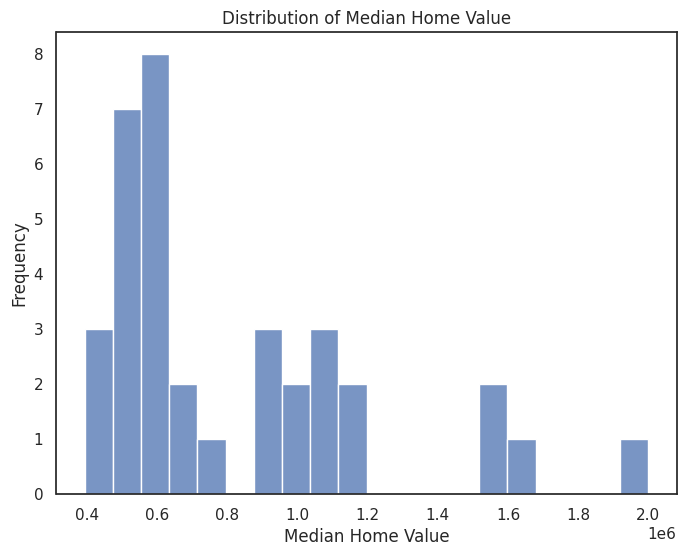

In [ ]:
# Histogram for 'Median Home Value' in 'df'
plt.figure(figsize=(8, 6))
sns.histplot(df['Median Home Value'], bins=20)
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()


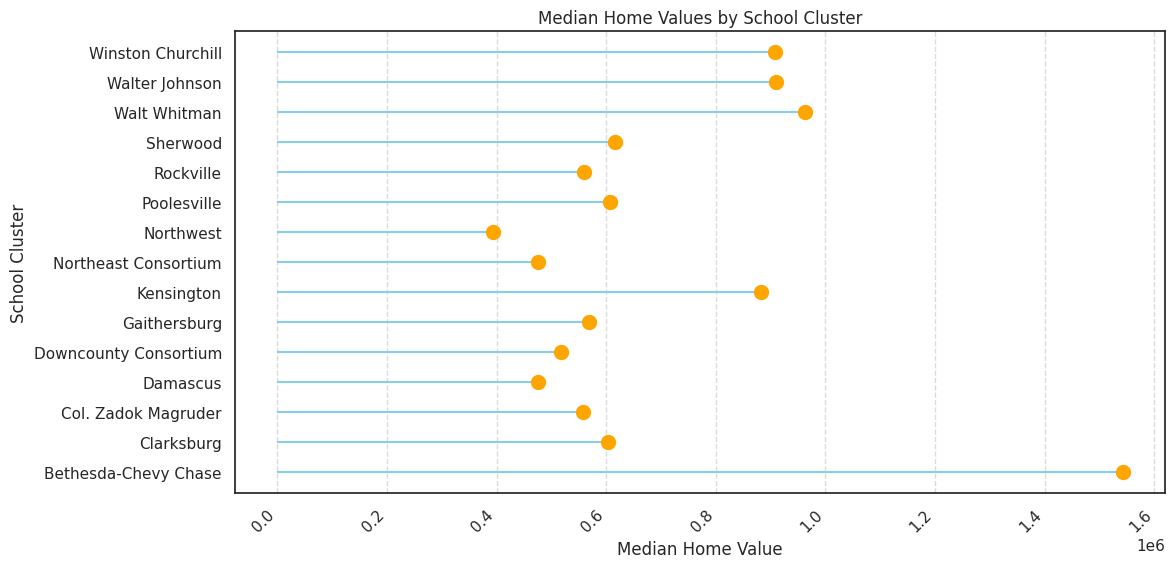

In [57]:
# plot of median home value by cluster
cluster_medians = df.groupby('Cluster')['Median Home Value'].median()

# Create the lollipop plot
plt.figure(figsize=(12, 6))
plt.hlines(y=cluster_medians.index, xmin=0, xmax=cluster_medians.values, color='skyblue')
plt.plot(cluster_medians.values, cluster_medians.index, "o", markersize=10, color='orange')

# Add labels and title
plt.xlabel('Median Home Value')
plt.ylabel('School Cluster')
plt.title('Median Home Values by School Cluster')

# Customize the plot (optional)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Show the plot
plt.show()


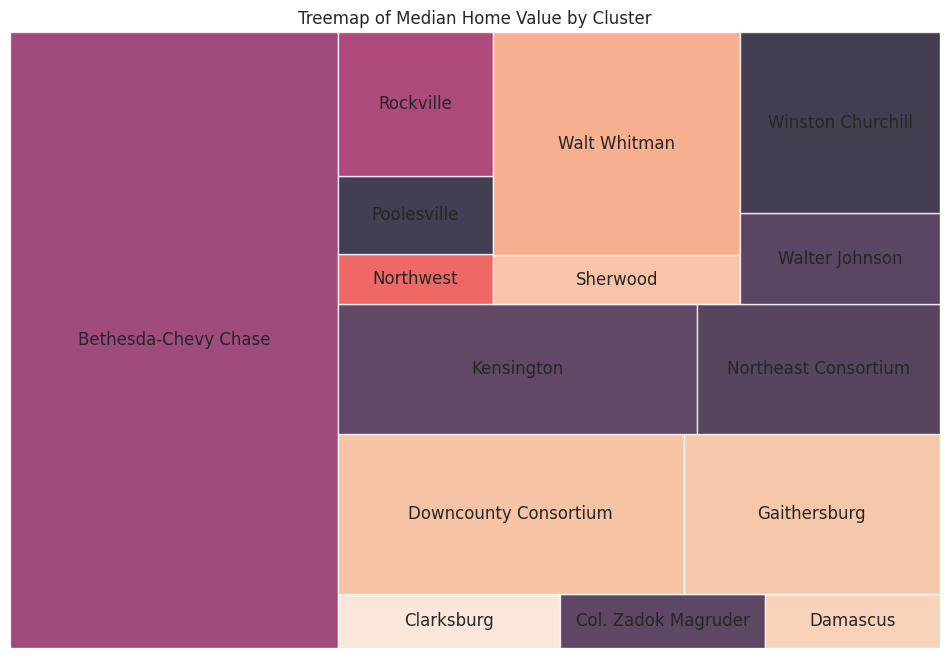

In [ ]:
# Median home value by cluster to better visualize the gaps between the neighborhoods' wealth.
!pip install squarify
import squarify
cluster_sums = df.groupby('Cluster')['Median Home Value'].sum()

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=cluster_sums, label=cluster_sums.index, alpha=.8 )
plt.title('Treemap of Median Home Value by Cluster')
plt.axis('off')
plt.show()


In [ ]:
# mean attendance rate
mean_attendance_rate = school['Attendance Rate'].mean()

# Print the mean attendance rate
print(f"Mean Attendance Rate: {mean_attendance_rate}")


Mean Attendance Rate: 94.396


In [ ]:
# mean college decision rate

mean_college_decision_rate = school['Grade 12 Documented Decision - College'].mean()

# Print the mean college decision rate
print(f"Mean College Decision Rate: {mean_college_decision_rate}")


Mean College Decision Rate: 92.69599999999998


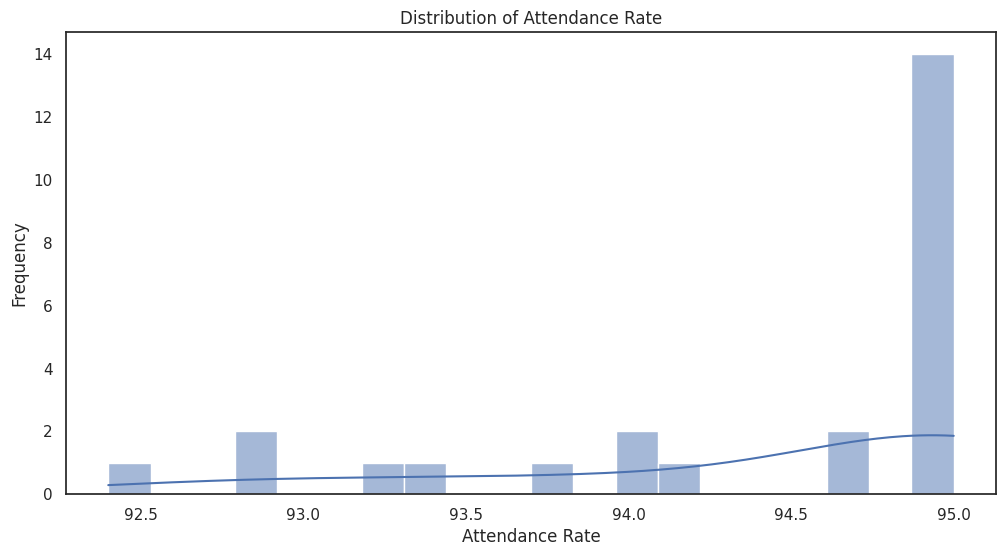

In [ ]:
# Histograms for attendance rate in 'school'
plt.figure(figsize=(12, 6))
sns.histplot(school['Attendance Rate'], bins=20, kde=True)
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()

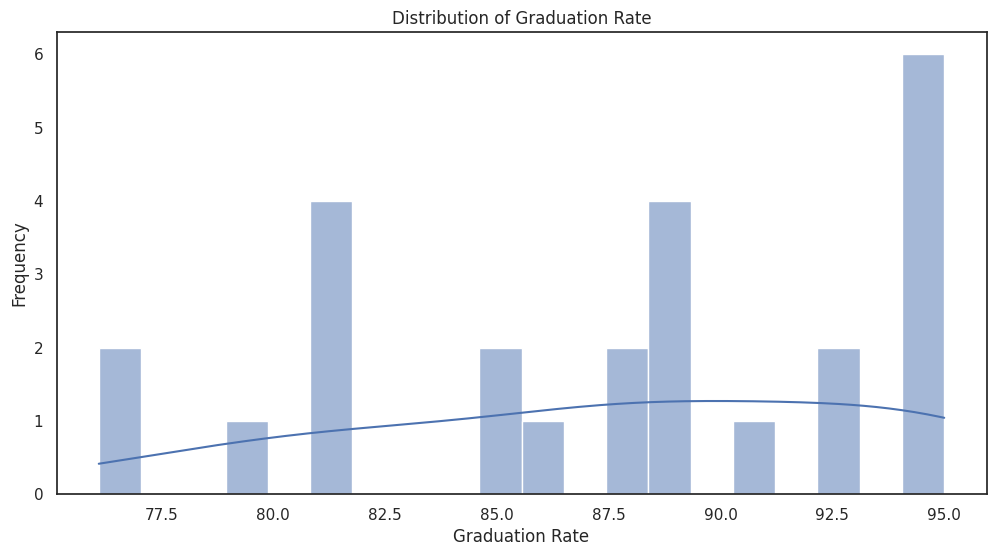

In [ ]:
# Histograms for graduation rate in 'school'
plt.figure(figsize=(12, 6))
sns.histplot(school['Graduation Rate'], bins=20, kde=True)
plt.title('Distribution of Graduation Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.show()

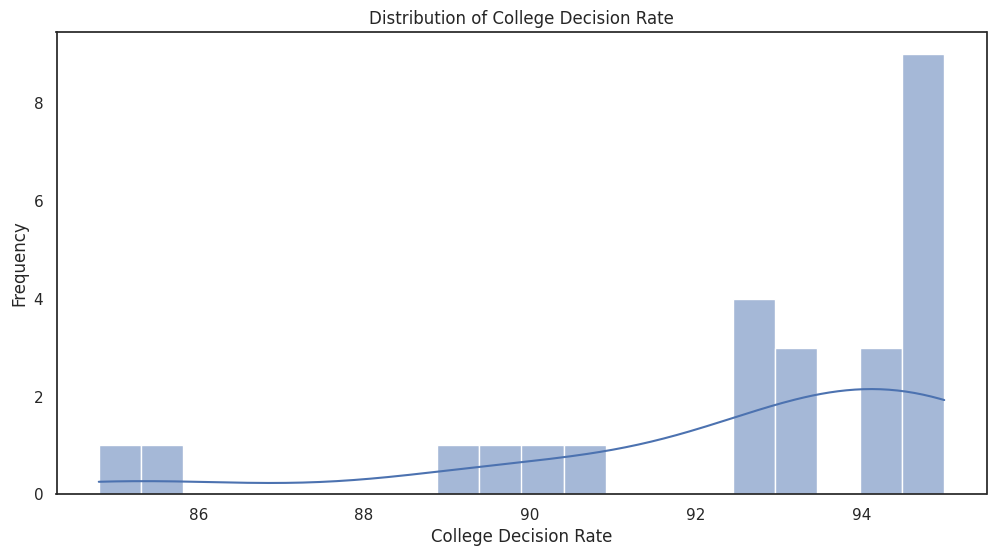

In [ ]:
# distribution of college decision rate
plt.figure(figsize=(12, 6))
sns.histplot(school['Grade 12 Documented Decision - College'], bins=20, kde=True)
plt.title('Distribution of College Decision Rate')
plt.xlabel('College Decision Rate')
plt.ylabel('Frequency')
plt.show()


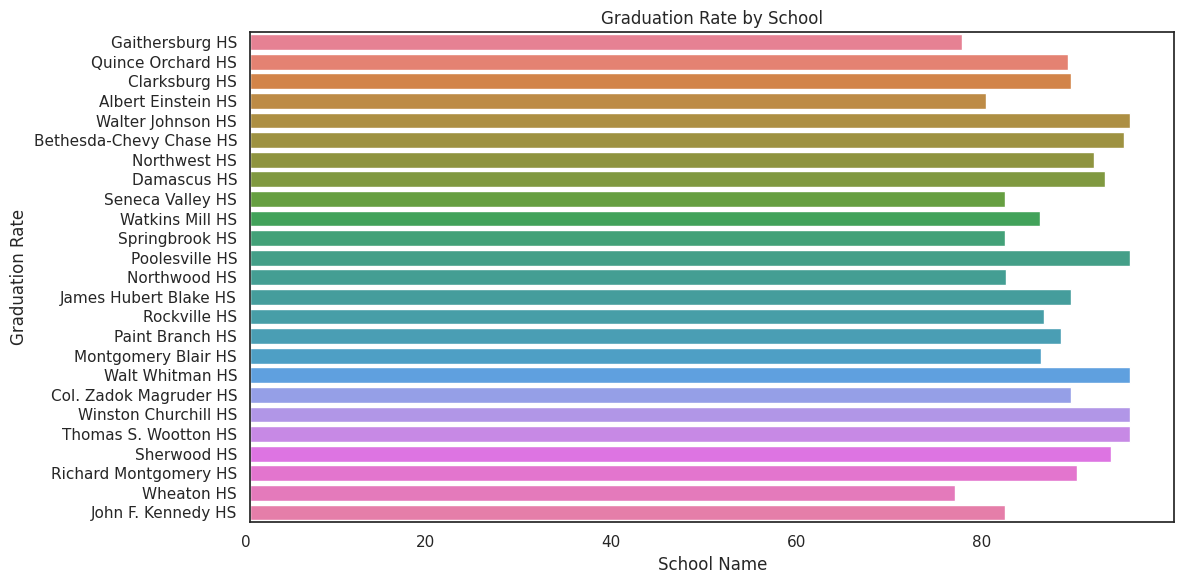

In [ ]:
# Barplot showing graduation rate of each school
plt.figure(figsize=(12, 6))
sns.barplot(data=school, x='Graduation Rate', y='School Name', orient='h', hue='School Name')
plt.xticks(ha='right')
plt.title('Graduation Rate by School')
plt.xlabel('School Name')
plt.ylabel('Graduation Rate')
plt.tight_layout()
plt.show()


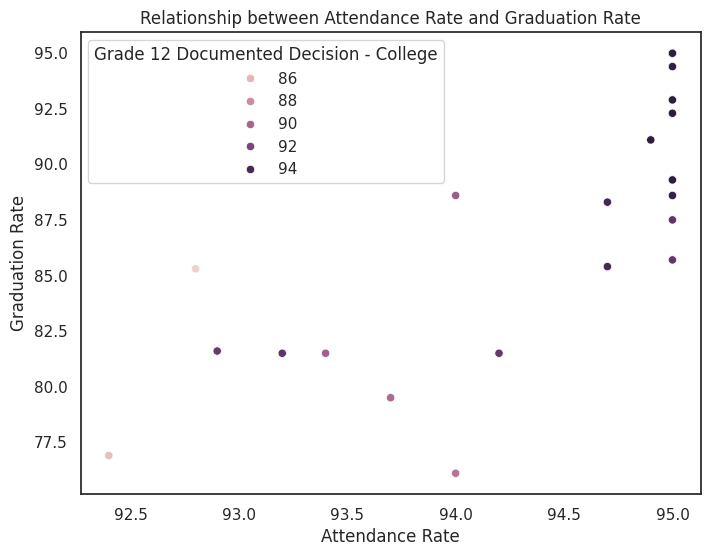

In [ ]:
# Scatter plot to explore relationship between attendance rate and graduation rate,
#colored depending on college admittance.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance Rate', y='Graduation Rate', data=school, hue='Grade 12 Documented Decision - College')
plt.title('Relationship between Attendance Rate and Graduation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Graduation Rate')
plt.show()

In [ ]:
# Merge the datasets location(it contains latitude and longitudes of the schools)
# and school to generate a heatmap based on graduation rates.

merged_data = pd.merge(school, location, left_on='School Name', right_on='SCHOOL NAME', how='inner')

# Map centered on Montgomery County
m = folium.Map(location=[39.1, -77.1], zoom_start=10)

heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['Graduation Rate']] for index, row in merged_data.iterrows()]

HeatMap(heat_data, radius=15, name="Graduation Rate").add_to(m)
folium.LayerControl().add_to(m)



m.save("map.html")
m
# The brighter the bubbles are the higher the graduation rate is.


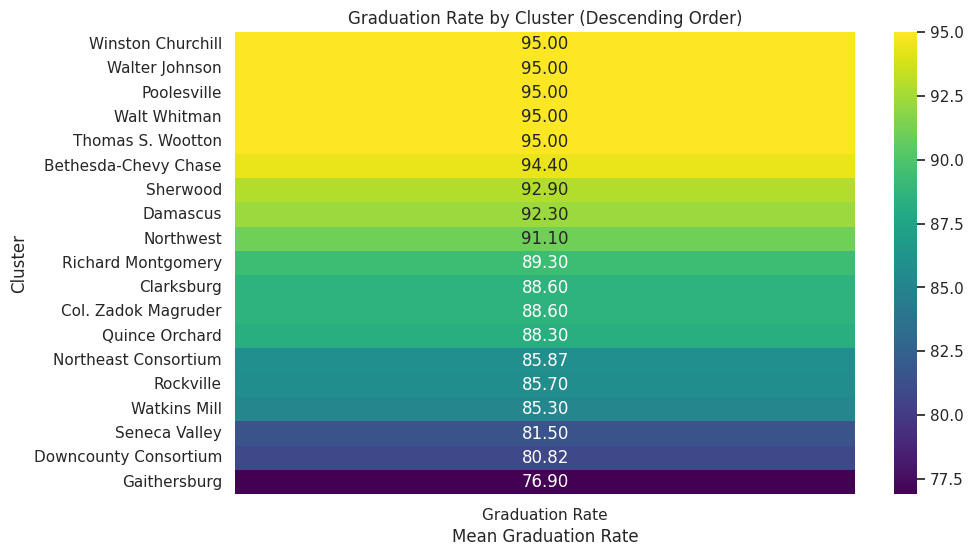

In [65]:
# heatmap of graduation rate by cluster
cluster_graduation_rates = school.groupby('Cluster')['Graduation Rate'].mean().sort_values(ascending=False)

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(cluster_graduation_rates).sort_values(by='Graduation Rate', ascending=False), annot=True, cmap='viridis', fmt=".2f")
plt.title('Graduation Rate by Cluster (Descending Order)')
plt.xlabel('Mean Graduation Rate')
plt.ylabel('Cluster')
plt.show()


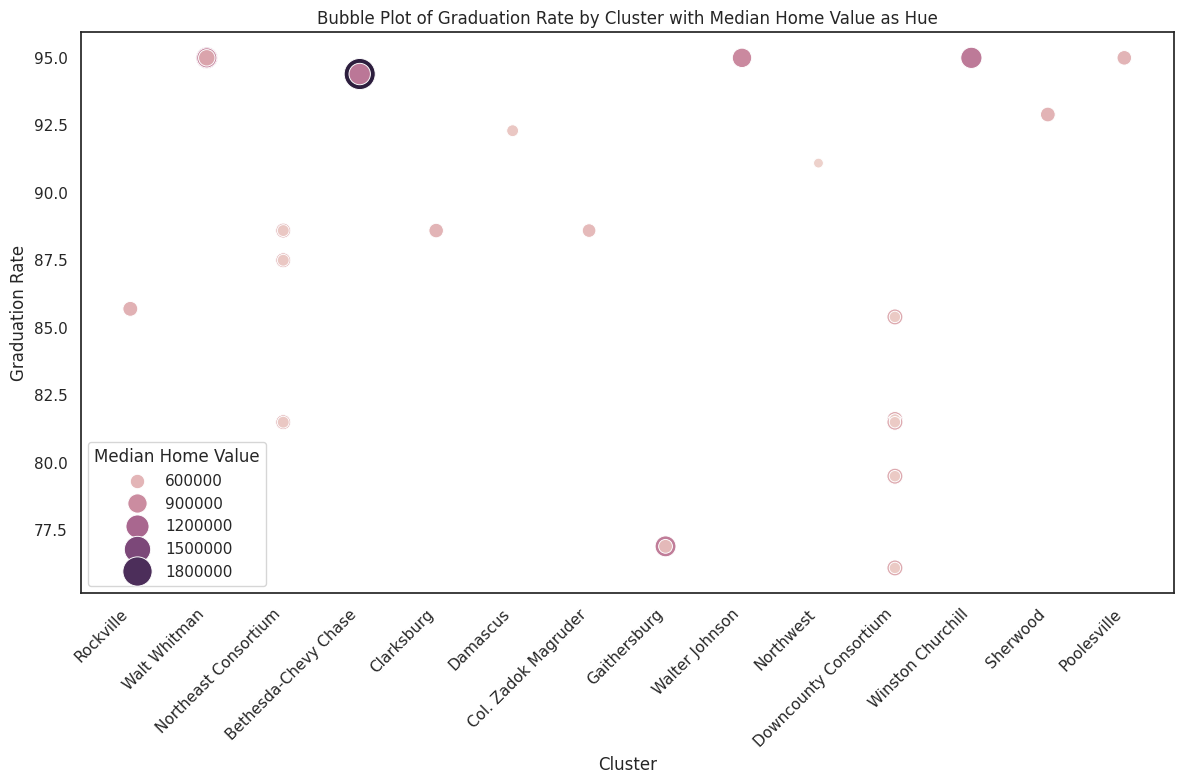

In [ ]:
#bubble plot of graduation rate by cluster, colored by median home value
merged_df = pd.merge(df, school, on='Cluster', how='inner')

# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Cluster', y='Graduation Rate', size='Median Home Value', data=merged_df, hue='Median Home Value', sizes=(50, 500))
plt.title('Bubble Plot of Graduation Rate by Cluster with Median Home Value as Hue')
plt.xlabel('Cluster')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


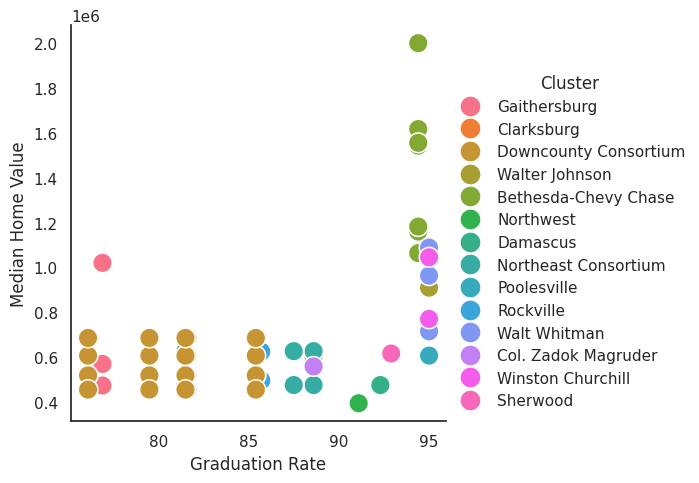

In [ ]:
# Plot of graduation rate by cluster vis-a-vis median home values
merged_df = pd.merge(school, df, left_on='Cluster', right_on='Cluster', how='inner')

# Create the relplot
sns.relplot(x="Graduation Rate", y="Median Home Value", hue="Cluster", data=merged_df, s=200)
plt.show()


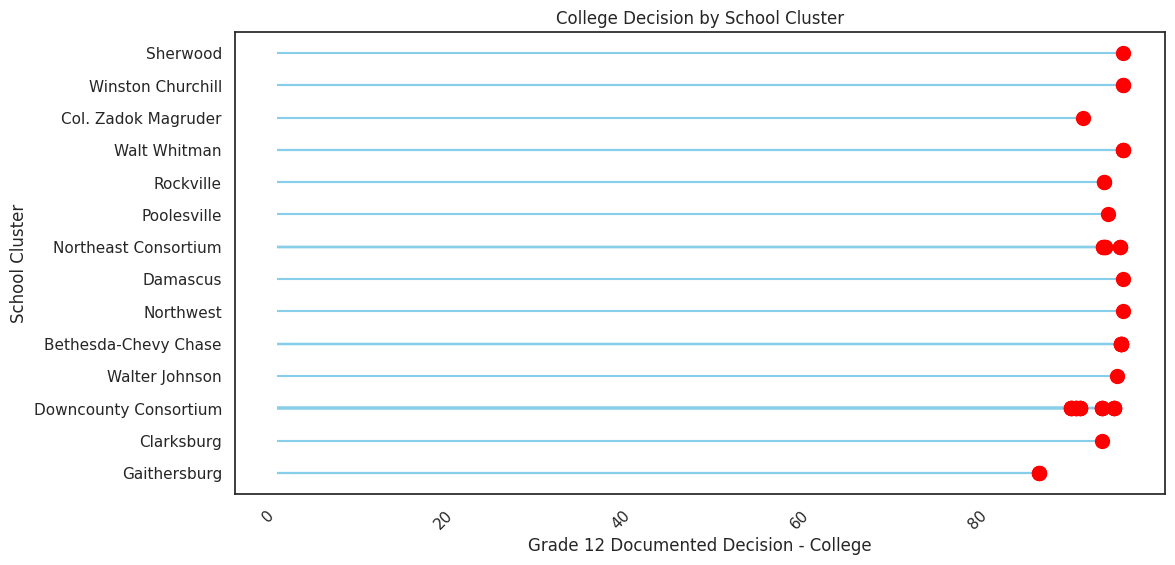

In [66]:
#lollipop plot showing the relationship between median home value and  grade 12 documented decision college


plt.figure(figsize=(12, 6))
plt.hlines(y=merged_df['Cluster'], xmin=0, xmax=merged_df['Grade 12 Documented Decision - College'], color='skyblue')
plt.plot(merged_df['Grade 12 Documented Decision - College'], merged_df['Cluster'], "o", markersize=10, color='red')

plt.xlabel('Grade 12 Documented Decision - College')
plt.ylabel('School Cluster')
plt.title('College Decision by School Cluster')
plt.grid(False)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


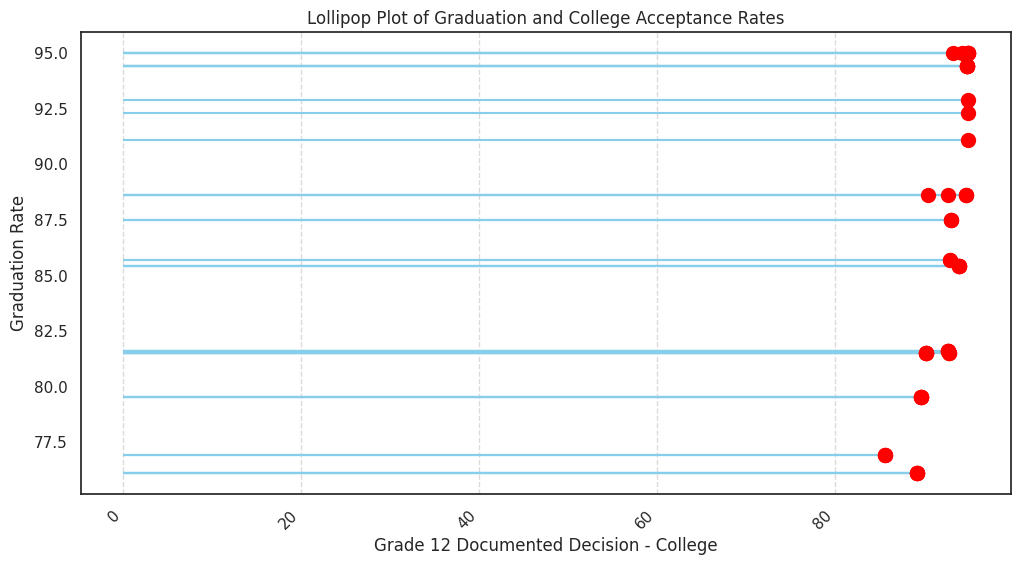

In [ ]:
# prompt: lollipop showing the relationship between graduation rate and grade 12 documented decision college

import matplotlib.pyplot as plt
#Lollipop plot showing the relationship between median home value and  grade 12 documented decision college
plt.figure(figsize=(12, 6))
plt.hlines(y=merged_df['Graduation Rate'], xmin=0, xmax=merged_df['Grade 12 Documented Decision - College'], color='skyblue')
plt.plot(merged_df['Grade 12 Documented Decision - College'], merged_df['Graduation Rate'], "o", markersize=10, color='red')

plt.xlabel('Grade 12 Documented Decision - College')
plt.ylabel('Graduation Rate')
plt.title('Lollipop Plot of Graduation and College Acceptance Rates')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [ ]:
# mean of college acceptance in the county

mean_college_decision_rate = school['Grade 12 Documented Decision - College'].mean()
print(f"Mean College Decision Rate: {mean_college_decision_rate}")


Mean College Decision Rate: 92.69599999999998


In [ ]:
cluster_means = merged_df.groupby('Cluster')['Grade 12 Documented Decision - College'].mean()

# Display
print(cluster_means)

Cluster
Bethesda-Chevy Chase    94.80
Clarksburg              92.70
Col. Zadok Magruder     90.50
Damascus                95.00
Downcounty Consortium   91.16
Gaithersburg            85.60
Northeast Consortium    93.50
Northwest               95.00
Poolesville             93.30
Rockville               92.90
Sherwood                95.00
Walt Whitman            95.00
Walter Johnson          94.30
Winston Churchill       95.00
Name: Grade 12 Documented Decision - College, dtype: float64


In [ ]:
#mean of home values by cluster

cluster_means = df.groupby('Cluster')['Median Home Value'].mean()

# Display the mean of home values by cluster
cluster_means


,Median Home Value
Cluster,
Bethesda-Chevy Chase,1445743.00
Clarksburg,604000.00
Col. Zadok Magruder,558000.00
Damascus,474800.00
Downcounty Consortium,556100.00
Gaithersburg,687266.67
Kensington,775700.00
Northeast Consortium,525666.67
Northwest,393700.00


<ipython-input-38-85ba39b30adb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Graduation Rate', data=final_df, palette="viridis", order=final_df['Cluster'])


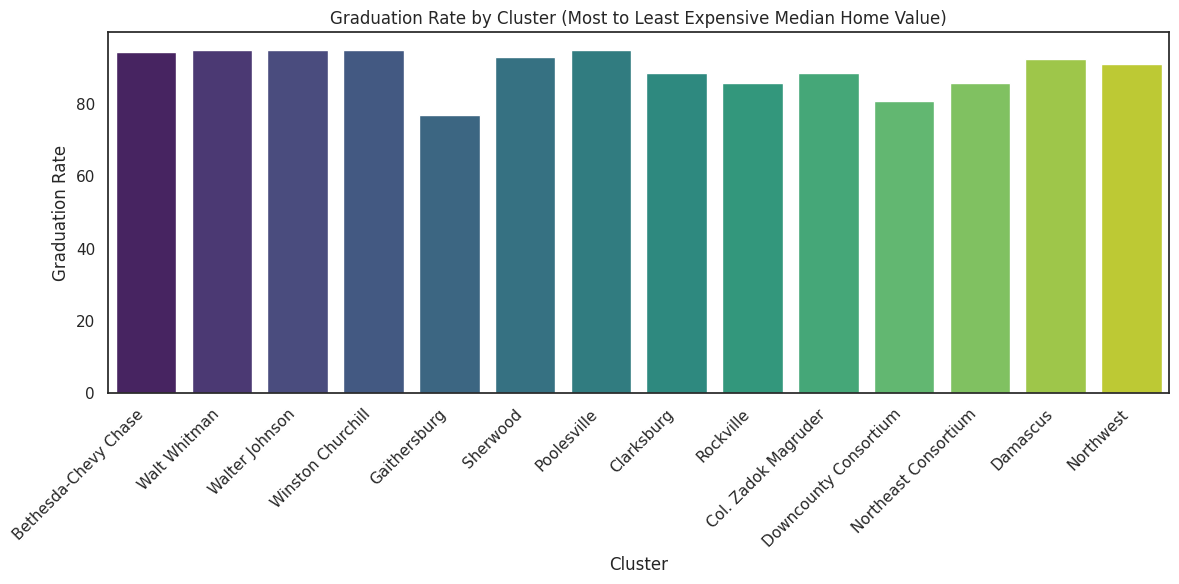

In [ ]:
#Graduation rates by Cluster from most to least expensive
merged_df = pd.merge(school, df, on='Cluster', how='inner')

# Group by cluster and calculate the mean median home value
cluster_home_values = merged_df.groupby('Cluster')['Median Home Value'].mean().reset_index()

# Sort clusters by median home value in descending order
cluster_home_values_sorted = cluster_home_values.sort_values(by='Median Home Value', ascending=False)

# Group by cluster and calculate the mean graduation rate
cluster_graduation_rates = merged_df.groupby('Cluster')['Graduation Rate'].mean().reset_index()

# Merge the sorted home values with graduation rates
final_df = pd.merge(cluster_home_values_sorted, cluster_graduation_rates, on='Cluster', how='inner')


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Graduation Rate', data=final_df, palette="viridis", order=final_df['Cluster'])
plt.title('Graduation Rate by Cluster (Most to Least Expensive Median Home Value)')
plt.xlabel('Cluster')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


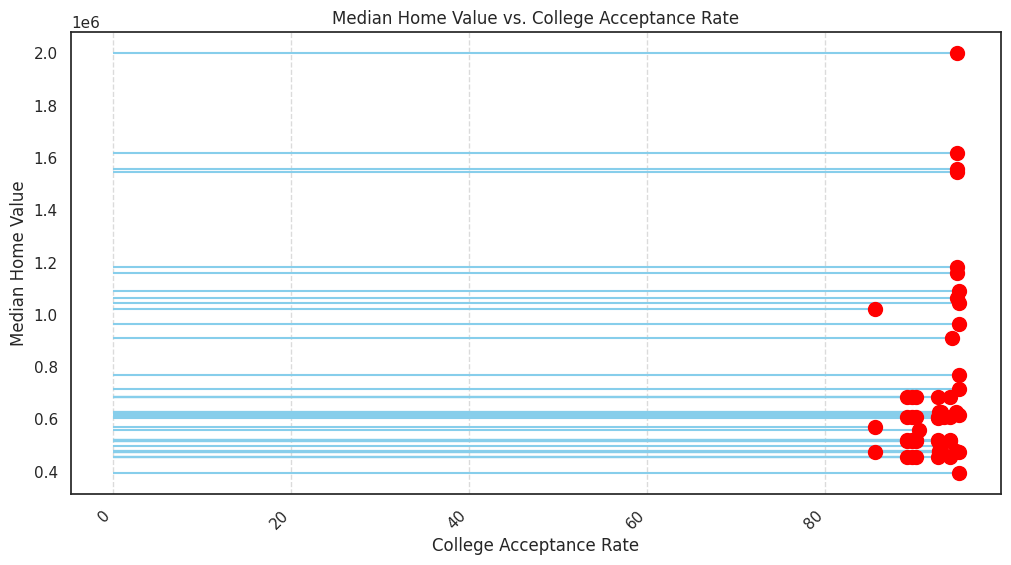

In [68]:
# prompt: nice plot of median home value and college acceptance rate

import matplotlib.pyplot as plt
# Assuming 'merged_df' from the provided code is available

plt.figure(figsize=(12, 6))
plt.hlines(y=merged_df['Median Home Value'], xmin=0, xmax=merged_df['Grade 12 Documented Decision - College'], color='skyblue')
plt.plot(merged_df['Grade 12 Documented Decision - College'], merged_df['Median Home Value'], "o", markersize=10, color='red')

plt.xlabel('College Acceptance Rate')
plt.ylabel('Median Home Value')
plt.title('Median Home Value vs. College Acceptance Rate')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


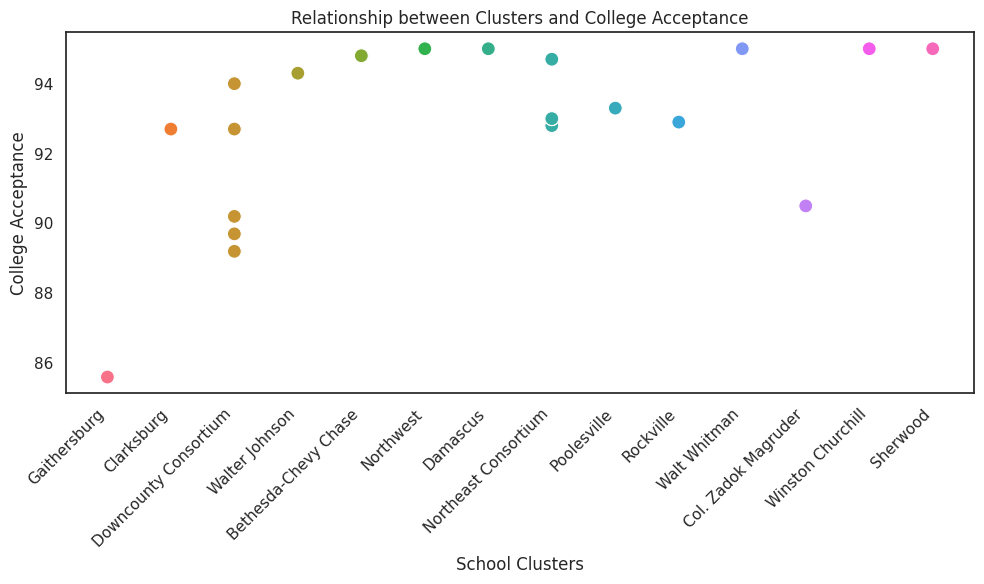

In [ ]:
# Scatterplot of median home value and college acceptance by clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Cluster", y="Grade 12 Documented Decision - College", data=merged_df, hue="Cluster", s=100, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Clusters and College Acceptance')
plt.xlabel('School Clusters')
plt.ylabel('College Acceptance')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


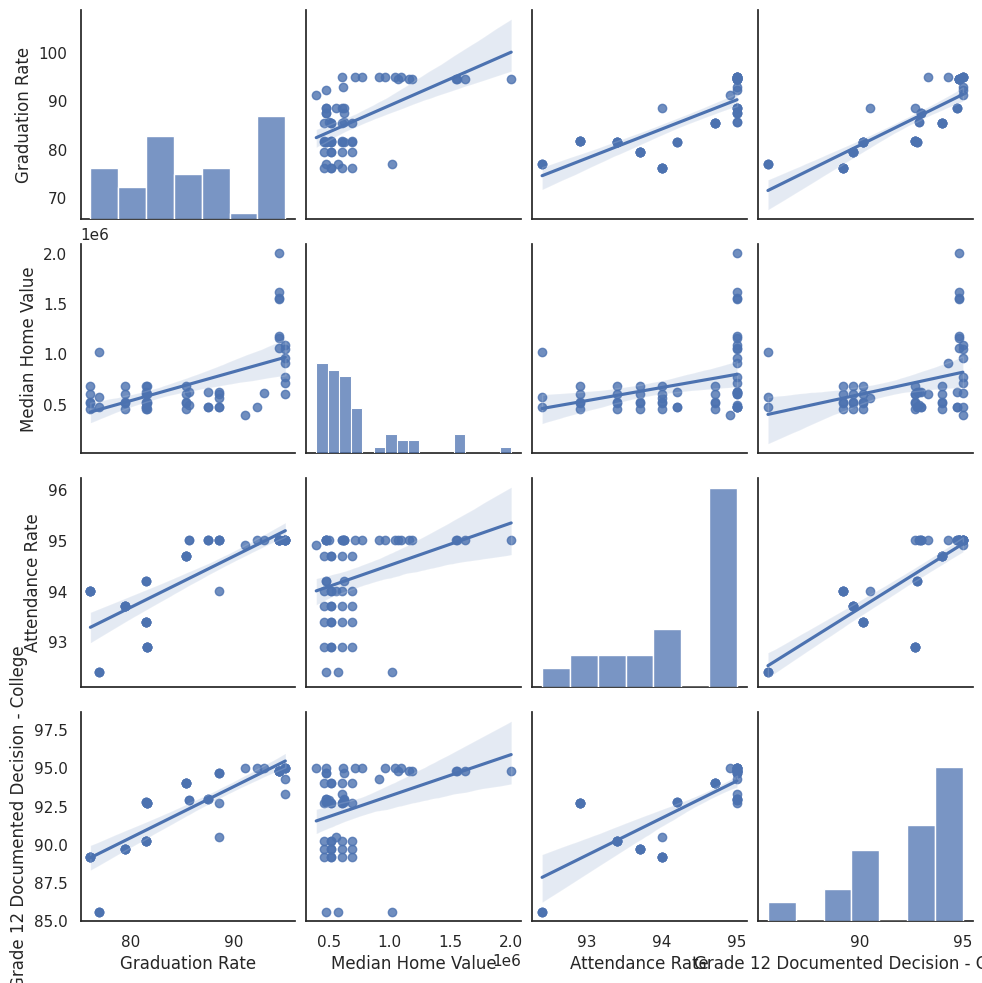

In [ ]:
#  Columns for correlation matrix
cols_for_correlation = ['Graduation Rate', 'Median Home Value', 'Attendance Rate', 'Grade 12 Documented Decision - College']

# Calculate the correlation matrix
correlation_matrix = merged_df[cols_for_correlation].corr()

# Create the pair plot
sns.pairplot(merged_df[cols_for_correlation], kind="reg", palette='viridis')  # kind="reg" adds regression lines

plt.show()

###**Modeling**###

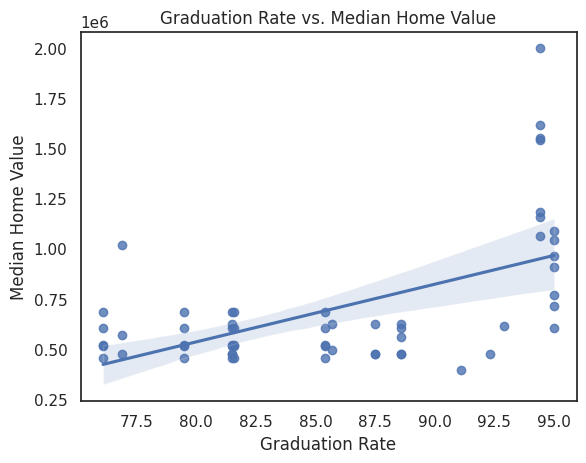

In [ ]:
#Regression plot of graduation rate and median home values
merged_df = pd.merge(school, df, left_on='Cluster', right_on='Cluster', how='inner')

# scatter plot with regression line
sns.regplot(x="Graduation Rate", y="Median Home Value", data=merged_df)
plt.title('Graduation Rate vs. Median Home Value')
plt.xlabel('Graduation Rate')
plt.ylabel('Median Home Value')
plt.show()


                                        Graduation Rate  Median Home Value  \
Graduation Rate                                    1.00               0.56   
Median Home Value                                  0.56               1.00   
Attendance Rate                                    0.78               0.33   
Grade 12 Documented Decision - College             0.84               0.35   

                                        Attendance Rate  \
Graduation Rate                                    0.78   
Median Home Value                                  0.33   
Attendance Rate                                    1.00   
Grade 12 Documented Decision - College             0.79   

                                        Grade 12 Documented Decision - College  
Graduation Rate                                                           0.84  
Median Home Value                                                         0.35  
Attendance Rate                                                       

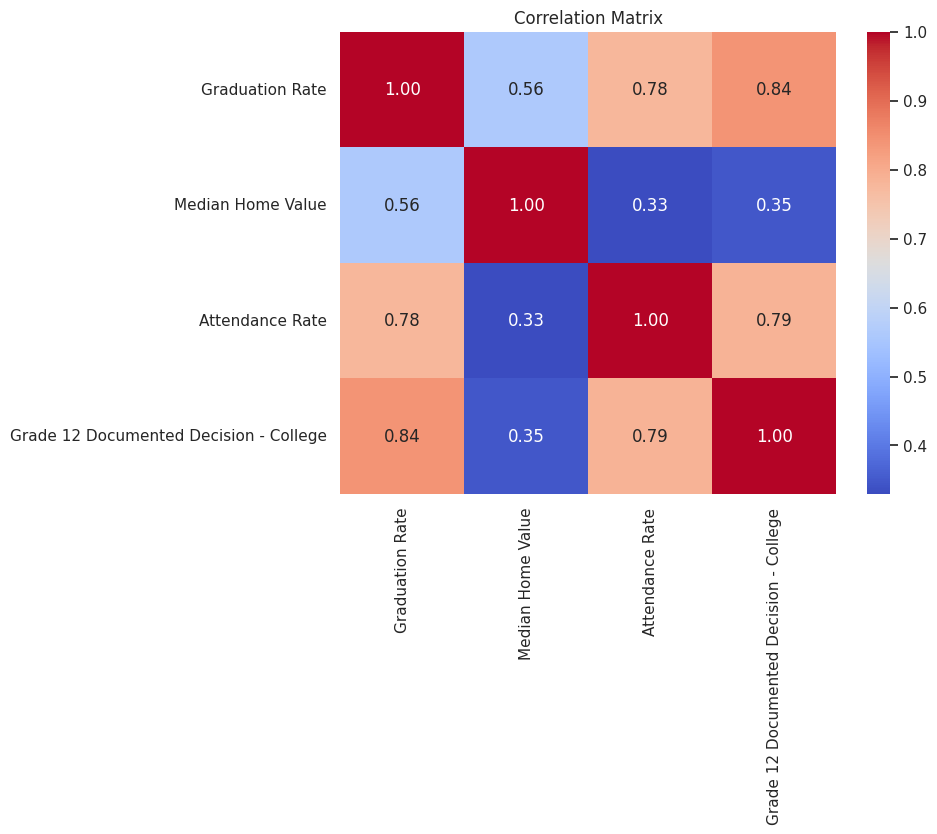

In [ ]:
# correlation matrix between graduation rate, median home value, attendance rate, college decision

correlation_matrix = merged_df[['Graduation Rate', 'Median Home Value', 'Attendance Rate', 'Grade 12 Documented Decision - College']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


###**Correlation Matrix:**
Only relevant data was added to the matrix to better visualize my analysis.

**Graduation Rate vs. Median Home Value(0.56)**: A positive correlation exists between these two values. As the median value in a cluster increases, the graduation rate in schools within that cluster tends to incease as well.

**Graduation Rate vs. Attendance Rate(0.78):** A very strong positive correlation, higher attendance rates are associated with higher graduation rates.

**Median Home Values vs. Attendance Rate(0.33):** A weak correlation exists between those two values, indicating that attendance rate is not contingent on higher median home values. It could even suggest that the opposite is true.

**Graduation Rate vs. College Decision(0.84):** A strong positive relationship exists between these two values. The higher the graduation rate, the higher the college decision.


In [ ]:
# Merge the dataframes
merged_df = pd.merge(school, df, on='Cluster', how='inner')



In [ ]:
correlation = merged_df['Graduation Rate'].corr(merged_df['Median Home Value'])
print(f"Correlation between Graduation Rate and Median Home Value: {correlation}")

Correlation between Graduation Rate and Median Home Value: 0.562505663014832


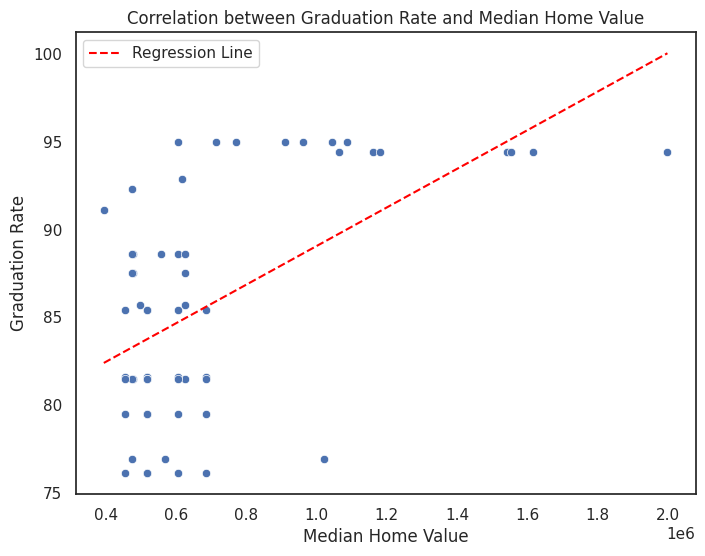

In [ ]:
#Let's see the true correlation between median home value and graduation rate from the correlation
#matrix's calculations(0.56)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Median Home Value', y='Graduation Rate', data=merged_df)

slope, intercept = np.polyfit(merged_df['Median Home Value'], merged_df['Graduation Rate'], 1)
x_values = np.array([merged_df['Median Home Value'].min(), merged_df['Median Home Value'].max()])

y_values = slope * x_values + intercept

# Plot the regression line (abline)
plt.plot(x_values, y_values, color='red', linestyle='--', label='Regression Line')


plt.title('Correlation between Graduation Rate and Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()

**Findings**:  there exists a moderately positive correlation between median home value and graduation rate. As the median home value in a cluster tends to increase, so does the graduation rate.



Let's calculate the r-squared in the regression.

R-squared: 0.3164126209237557


,Metric,Value
0,R-squared,0.32
1,Slope,0.00
2,Intercept,78.06
3,P-value,0.00
4,Standard Error,0.00


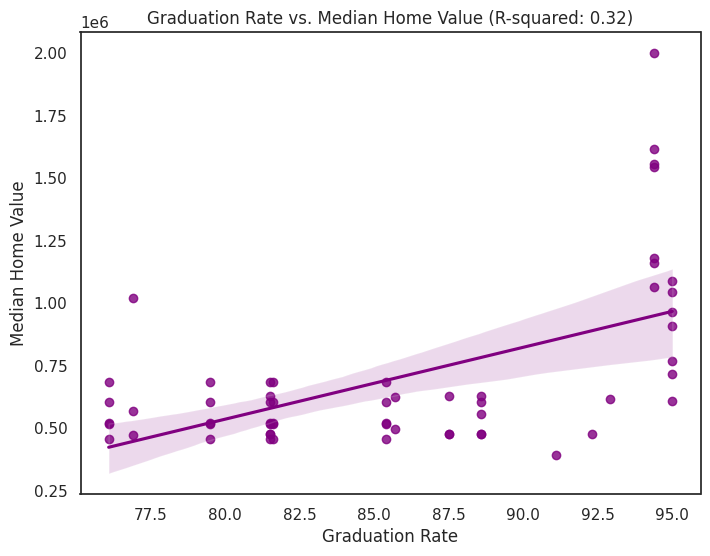

In [ ]:

merged_df = pd.merge(school, df, left_on='Cluster', right_on='Cluster', how='inner')

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Median Home Value'], merged_df['Graduation Rate'])

# R-squared
r_squared = r_value**2

# Print R-squared value
print(f"R-squared: {r_squared}")

results_df = pd.DataFrame({
    'Metric': ['R-squared', 'Slope', 'Intercept', 'P-value', 'Standard Error'],
    'Value': [r_squared, slope, intercept, p_value, std_err]
})
display(results_df)

# Create the scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x="Graduation Rate", y="Median Home Value", data=merged_df, color="purple")
plt.title(f'Graduation Rate vs. Median Home Value (R-squared: {r_squared:.2f})')
plt.xlabel('Graduation Rate')
plt.ylabel('Median Home Value')

plt.show()


**P-value interpretation:** The null hypothesis of our analysis states that median home values do not affect graduation rate, while the alternative analysis tells us the opposite. Since the analysis found the p-value at lower than 0%, the null hypothesis is rejected in favor of the alternate one. There is a statistical relationship between the two values.

**R-squared interpretation:** the r-squared that measures the relationship between median home values and graduation rate falls at just a little over 31%. this figure means that overall median home value is affecting the graduation rate of students by as little as 31%. The other 69% has to do with different factors in the dataset. While the correlation between those two values remains at 56%, with a p-value signifying a strong association, the r-squared indicates that there are other factors that are affecting graduation rates. Yes there exists a positive correlation between higher home values and graduation rates, but the score removes it from being the ultimate factor in students' success.

To better illustrate it, we go back to the other figures in the correlation matrix: attendance and college acceptance rate.




The correlation between attendance rate and graduation rate is: 0.7649619551158439
Slope: 5.415372815172929
Intercept: -423.52553226106374
R-squared: 0.5851667927746543
P-value: 8.446200132738759e-06


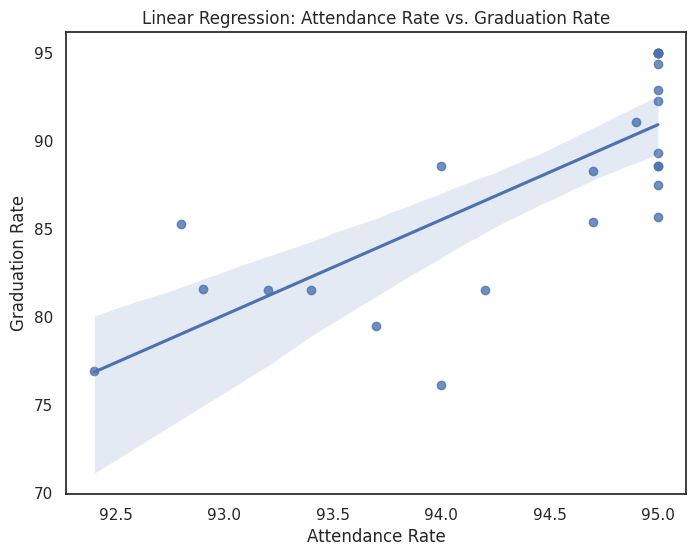

In [ ]:
# Calculate the correlation between attendance rate and graduation rate
correlation = school['Attendance Rate'].corr(school['Graduation Rate'])

print(f"The correlation between attendance rate and graduation rate is: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(school['Attendance Rate'], school['Graduation Rate'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Attendance Rate', y='Graduation Rate', data=school)
plt.title('Linear Regression: Attendance Rate vs. Graduation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Graduation Rate')
plt.show()


The correlation between attendance rate and graduation rate is: 0.6905579029007907
Slope: 5.415372815172929
Intercept: -423.52553226106374
R-squared: 0.5851667927746543
P-value: 8.446200132738759e-06


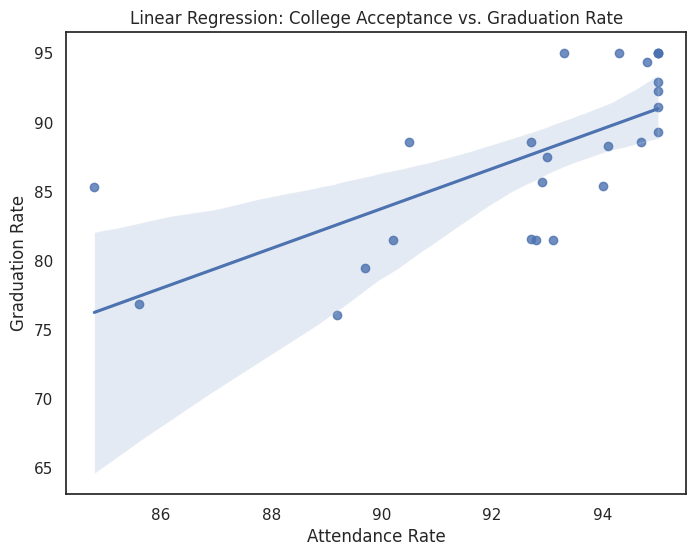

In [ ]:
# Calculate the correlation between attendance rate and graduation rate
correlation = school['Grade 12 Documented Decision - College'].corr(school['Graduation Rate'])

print(f"The correlation between attendance rate and graduation rate is: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(school['Attendance Rate'], school['Graduation Rate'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Grade 12 Documented Decision - College', y='Graduation Rate', data=school)
plt.title('Linear Regression: College Acceptance vs. Graduation Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Graduation Rate')
plt.show()


Attendance rate and college acceptance vs. graduation rate:

Slope: 5.42: This positive slope indicates a positive relationship between attendance and graduation rates.

R-squared: 0.59

The R-squared value of 0.59 indicates that approximately 59% of the variation in graduation rates can be explained by attendance and college acceptance rate . This suggests a moderate to strong relationship between the three variables.

P-value: 8.446200132738759e-06

In this case, the p-value is extremely small (8.45e-06), providing strong support for the relationship.

In summary, the results indicate a statistically significant positive relationship between attendance rate and graduation rate. The conclusion also serves to correlate college acceptance with those two values. Higher attendance rates are associated with higher graduation rates, and approximately 59% of the variation in graduation rates can be explained by attendance rates. The slope of 5.42 suggests that for every one-unit increase in attendance rate, the graduation rate is expected to increase by 5.42 units. These findings highlight the importance of attendance in achieving academic success, as measured by graduation rates.

In [ ]:
# anova between graduation rate, grade 12 documented decision college, and attendance rate
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # import anova_lm directly from statsmodels.stats.anova

merged_df = pd.merge(school, df, on='Cluster', how='inner')

model = sm.ols('Q("Graduation Rate") ~ C(Cluster) + Q("Grade 12 Documented Decision - College") + Q("Attendance Rate")', data=merged_df).fit()
anova_table = anova_lm(model, typ=2) # Call anova_lm directly

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(Cluster),525.05,13.00,17.49,0.00
"Q(""Grade 12 Documented Decision - College"")",173.47,1.00,75.12,0.00
"Q(""Attendance Rate"")",9.97,1.00,4.32,0.04
Residual,97.00,42.00,NaN,NaN


Interpretation

C(Cluster): The p-value of 0.00 indicates that there is a statistically significant difference in graduation rates between different clusters. In other words, the school cluster a student belongs to has a significant effect on their graduation rate.

Q("Grade 12 Documented Decision - College"): The very low p-value (0.00) suggests that the 'Grade 12 Documented Decision - College' (likely college acceptance rate) has a very strong and statistically significant impact on graduation rates. Students who have made a college decision are more likely to graduate.

Q("Attendance Rate"): The p-value of 0.04 is less than the typical significance level of 0.05, indicating that attendance rate also has a statistically significant, though less strong, effect on graduation rates. Higher attendance rates are associated with higher graduation rates.

In Summary

School cluster, college acceptance, and attendance rate all significantly influence graduation rates.
Cluster has the strongest association with graduation rates, followed by college acceptance, and then attendance rate.
There is still some unexplained variation in graduation rates, indicating that other factors may also be involved.

In [ ]:
#pairwise comparison between clusters and graduation rate
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(merged_df['Graduation Rate'], merged_df['Cluster'], alpha=0.05)

# Print the results
print(tukey_result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
 Bethesda-Chevy Chase            Clarksburg     -5.8 0.7483 -15.9929   4.3929  False
 Bethesda-Chevy Chase   Col. Zadok Magruder     -5.8 0.7483 -15.9929   4.3929  False
 Bethesda-Chevy Chase              Damascus     -2.1    1.0 -12.2929   8.0929  False
 Bethesda-Chevy Chase Downcounty Consortium   -13.58    0.0 -17.6572  -9.5028   True
 Bethesda-Chevy Chase          Gaithersburg    -17.5    0.0 -24.0795 -10.9205   True
 Bethesda-Chevy Chase  Northeast Consortium  -8.5333    0.0 -13.3383  -3.7284   True
 Bethesda-Chevy Chase             Northwest     -3.3  0.996 -13.4929   6.8929  False
 Bethesda-Chevy Chase           Poolesville      0.6    1.0  -9.5929  10.7929  False
 Bethesda-Chevy Chase             Rockville     -8.7 0.0134 -16.3

In [ ]:
# prompt: pairwise comparison between graduation rate, documented decision college, attendance rate

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result_grad_cluster = pairwise_tukeyhsd(merged_df['Graduation Rate'], merged_df['Cluster'], alpha=0.05)
print("Tukey's HSD Test (Graduation Rate vs. Cluster):")
print(tukey_result_grad_cluster)

# Pairwise comparison for documented college decision and graduation rate
tukey_result_college_grad = pairwise_tukeyhsd(merged_df['Grade 12 Documented Decision - College'], merged_df['Graduation Rate'], alpha=0.05)
print("\nTukey's HSD Test (College Decision vs. Graduation Rate):")
print(tukey_result_college_grad)

# Pairwise comparison for attendance rate and graduation rate
tukey_result_attend_grad = pairwise_tukeyhsd(merged_df['Attendance Rate'], merged_df['Graduation Rate'], alpha=0.05)
print("\nTukey's HSD Test (Attendance Rate vs. Graduation Rate):")
tukey_result_attend_grad


Tukey's HSD Test (Graduation Rate vs. Cluster):
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                group2        meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------
 Bethesda-Chevy Chase            Clarksburg     -5.8 0.7483 -15.9929   4.3929  False
 Bethesda-Chevy Chase   Col. Zadok Magruder     -5.8 0.7483 -15.9929   4.3929  False
 Bethesda-Chevy Chase              Damascus     -2.1    1.0 -12.2929   8.0929  False
 Bethesda-Chevy Chase Downcounty Consortium   -13.58    0.0 -17.6572  -9.5028   True
 Bethesda-Chevy Chase          Gaithersburg    -17.5    0.0 -24.0795 -10.9205   True
 Bethesda-Chevy Chase  Northeast Consortium  -8.5333    0.0 -13.3383  -3.7284   True
 Bethesda-Chevy Chase             Northwest     -3.3  0.996 -13.4929   6.8929  False
 Bethesda-Chevy Chase           Poolesville      0.6    1.0  -9.5929  10.7929  False
 Bethesda-Chevy C